In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import pi


In [2]:
diamonds = pd.read_csv(r'C:\Users\radek\IronHack\IronRadek\Week4\Project_Week_4\diamonds_clean.csv')
diamonds.drop(columns='Unnamed: 0', inplace=True)
diamonds.head()


,carat,cut,depth,table,price,x,y,z,clarity_scale,color_scale
0,0.23,Ideal,61.5,55.0,326,3.95,3.98,2.43,1,5
1,0.21,Premium,59.8,61.0,326,3.89,3.84,2.31,2,5
2,0.23,Good,56.9,65.0,327,4.05,4.07,2.31,4,5
3,0.29,Premium,62.4,58.0,334,4.20,4.23,2.63,3,1
4,0.31,Good,63.3,58.0,335,4.34,4.35,2.75,1,0


# Matplotlib

## 1.Linear

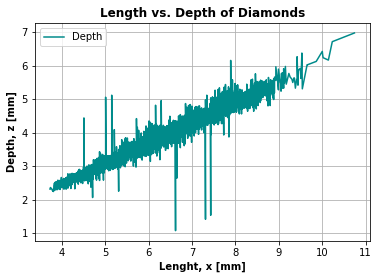

In [3]:
diamonds.sort_values(by=["x", "z"], inplace=True)

line_mpl = plt.figure() 

plt.plot("x","z", data=diamonds, color='darkcyan', label='Depth')

plt.title('Length vs. Depth of Diamonds', fontweight='bold')
plt.xlabel('Lenght, x [mm]', fontweight='bold')
plt.ylabel('Depth, z [mm]', fontweight='bold')
plt.grid()
plt.legend()
plt.show()

## 2.Bar 

In [4]:
size_cut = diamonds.groupby(['cut'])['carat'].agg(['count'])
size_cut.reset_index(inplace=True)
size_cut

,cut,count
0,Fair,1609
1,Good,4904
2,Ideal,21549
3,Premium,13788
4,Very Good,12081


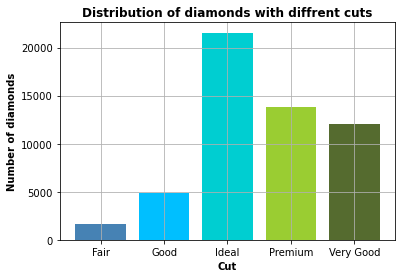

In [5]:
bar_mpl = plt.figure()
colors= ['steelblue', 'deepskyblue', 'darkturquoise', 'yellowgreen', 'darkolivegreen']
plt.bar("cut","count", data=size_cut, color=colors)

plt.title('Distribution of diamonds with diffrent cuts', fontweight='bold')
plt.xlabel('Cut', fontweight='bold')
plt.ylabel('Number of diamonds', fontweight='bold')
plt.grid()
plt.show()


## 3.Scatter

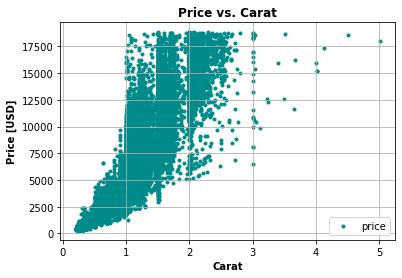

In [6]:
scatter_mpl = plt.figure() 

plt.scatter("carat","price", data=diamonds, color='darkcyan', label='price', marker='.')

plt.title('Price vs. Carat', fontweight='bold')
plt.xlabel('Carat', fontweight='bold')
plt.ylabel('Price [USD]', fontweight='bold')
plt.grid()
plt.legend(loc=4)
plt.show()

## 4.Boxplot

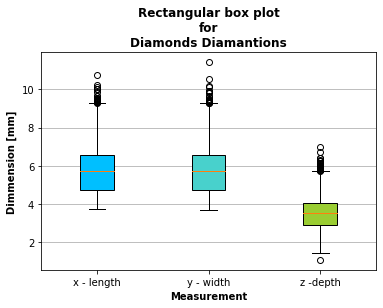

In [7]:
box_mpl = plt.figure()

data=diamonds[['x','y','z']]
labels = ['x - length', 'y - width','z -depth']


# rectangular box plot
bplot1 = plt.boxplot(data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels, # will be used to label x-ticks
                     )  
plt.title('Rectangular box plot\nfor\nDiamonds Diamantions', fontweight='bold')

# fill with colors
colors = ['deepskyblue', 'mediumturquoise', 'yellowgreen']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

# adding horizontal grid lines
plt.grid(axis='y')
plt.ylabel('Dimmension [mm]', fontweight='bold')
plt.xlabel('Measurement', fontweight='bold')

plt.show()

## 5.Piechart

In [8]:
size_clarity = diamonds.groupby(['clarity_scale'])['carat'].agg(['count'])
size_clarity.reset_index(inplace=True)
size_clarity

,clarity_scale,count
0,0,741
1,1,9189
2,2,13065
3,3,12256
4,4,8170
5,5,5066
6,6,3654
7,7,1790


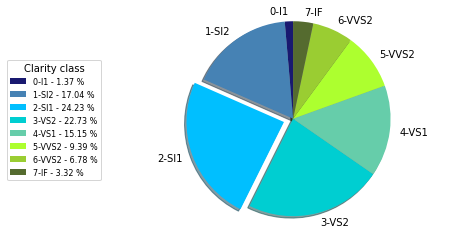

In [9]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['0-I1', '1-SI2', '2-SI1', '3-VS2', '4-VS1', '5-VVS2', '6-VVS2', '7-IF']
sizes = size_clarity['count']
explode = (0, 0, 0.1, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

colors = ['midnightblue','steelblue', 'deepskyblue', 'darkturquoise', 'mediumaquamarine', 'greenyellow', 'yellowgreen', 'darkolivegreen']



labels2 = ['{0} - {1:1.2f} %'.format(i, j) for i, j in zip(labels,
100*sizes/sizes.sum())]


pie_mpl, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode,labels=labels, colors=colors,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels2, loc='center left',title='Clarity class', bbox_to_anchor=(-0.35, .5), fontsize=8)
plt.show()

## 6.Radar

In [10]:
cut_avg = diamonds.groupby(['cut']).agg('mean')

cut_avg.drop(columns=['carat', 'depth', 'table', 'price'], inplace=True)
cut_avg.reset_index(inplace=True)
cut_avg

,cut,x,y,z,clarity_scale,color_scale
0,Fair,6.250777,6.186495,3.985245,2.020510,3.148539
1,Good,5.841166,5.853130,3.643072,2.603589,3.426591
2,Ideal,5.507962,5.519339,3.401952,3.458304,3.470741
3,Premium,5.974600,5.941900,3.650237,2.739629,3.302654
4,Very Good,5.741171,5.770503,3.557726,2.999338,3.433573


In [11]:
categories = list(cut_avg)[1:]
categories

['x', 'y', 'z', 'clarity_scale', 'color_scale']

In [12]:
values =cut_avg.loc[0].drop('cut').values.flatten().tolist()
values

[6.25077688004972,
 6.186494717215662,
 3.985245494095712,
 2.0205096333126167,
 3.1485394655065257]

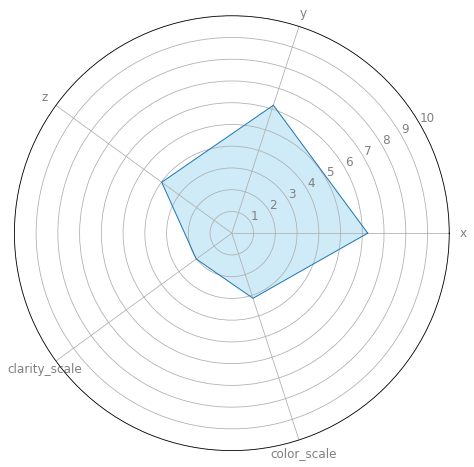

In [13]:
categories = list(cut_avg)[1:]
values = cut_avg.loc[0].drop('cut').values.flatten().tolist()
values += values[:1] # repeat the first value to close the circular graph
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8),
                       subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], categories, color='grey', size=12)
plt.yticks(np.arange(1, 11),[1,2,3,4,5,6,7,8,9,10] ,
           color='grey', size=12)
plt.ylim(0, 10)
ax.set_rlabel_position(30)
 
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'skyblue', alpha=0.4)
plt.show()

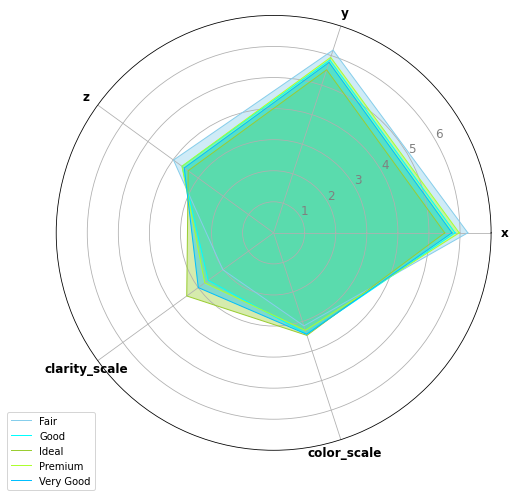

In [14]:
categories = list(cut_avg)[1:]

angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8),
                       subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], categories, fontweight='bold', size=12)
plt.yticks(np.arange(1, 7),[1,2,3,4,5,6] ,
           color='grey', size=12)
plt.ylim(0, 7)
ax.set_rlabel_position(30)
 

# part 1
val_c1 = cut_avg.loc[0].drop('cut').values.flatten().tolist()
val_c1 += val_c1[:1]
ax.plot(angles, val_c1, linewidth=1, color='skyblue',
        linestyle='solid', label='Fair')
ax.fill(angles, val_c1, 'skyblue', alpha=0.4)
 
# part 2
val_c2=cut_avg.loc[1].drop('cut').values.flatten().tolist()
val_c2 += val_c2[:1]
ax.plot(angles, val_c2, linewidth=1, color='cyan',
        linestyle='solid', label='Good')
ax.fill(angles, val_c2, 'cyan', alpha=0.4)

#part 3
val_c3=cut_avg.loc[2].drop('cut').values.flatten().tolist()
val_c3 += val_c3[:1]
ax.plot(angles, val_c3, linewidth=1, color='yellowgreen',
        linestyle='solid', label='Ideal')
ax.fill(angles, val_c3, 'yellowgreen', alpha=0.4)
#part 4
val_c4=cut_avg.loc[3].drop('cut').values.flatten().tolist()
val_c4 += val_c4[:1]
ax.plot(angles, val_c4, linewidth=1, color='greenyellow',
        linestyle='solid', label='Premium')
ax.fill(angles, val_c4, 'greenyellow', alpha=0.4)

#part 5
val_c5=cut_avg.loc[4].drop('cut').values.flatten().tolist()
val_c5 += val_c5[:1]
ax.plot(angles, val_c5, linewidth=1, color='deepskyblue',
        linestyle='solid', label='Very Good')
ax.fill(angles, val_c5, 'deepskyblue', alpha=0.4)

 
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

## 7.Multiple series

In [15]:
diamonds[(diamonds['color_scale'] == 0)]

,carat,cut,depth,table,price,x,y,z,clarity_scale,color_scale
11,0.23,Ideal,62.8,56.0,340,3.93,3.90,2.46,4,0
5,0.24,Very Good,62.8,57.0,336,3.94,3.96,2.48,5,0
28291,0.24,Ideal,62.8,57.0,432,3.96,3.94,2.48,5,0
29632,0.27,Very Good,60.8,57.0,443,4.16,4.20,2.54,5,0
19,0.30,Very Good,62.7,59.0,351,4.21,4.27,2.66,2,0
...,...,...,...,...,...,...,...,...,...,...
27678,3.01,Premium,59.7,58.0,18710,9.41,9.32,5.59,1,0
27672,3.51,Premium,62.5,59.0,18701,9.66,9.63,6.03,3,0
25994,4.01,Premium,62.5,62.0,15223,10.02,9.94,6.24,0,0
27623,4.50,Fair,65.8,58.0,18531,10.23,10.16,6.72,0,0


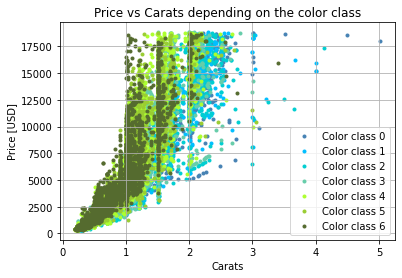

In [16]:

mltlines = plt.figure()
diamonds.sort_values(by=["carat", "price"], inplace=True)
colors = ['steelblue', 'deepskyblue', 'darkturquoise', 'mediumaquamarine', 'greenyellow', 'yellowgreen', 'darkolivegreen']
for num in range(7):
	class_color = diamonds[(diamonds['color_scale'] == num)]
	plt.scatter("carat","price", color=colors[num], label=f'Color class {num}', marker='.', data=class_color)


plt.xlabel('Carats')
plt.ylabel('Price [USD]')

plt.title("Price vs Carats depending on the color class")
plt.legend()
plt.grid()
plt.show()



## 8.3D Charts

In [33]:
color_avg = diamonds.groupby(['color_scale']).agg('mean')
color_avg.reset_index(inplace=True)
color_avg

,color_scale,carat,depth,table,price,x,y,z,clarity_scale
0,0,1.162137,61.887215,57.812393,5323.818020,6.519338,6.518105,4.033251,2.776353
1,1,1.026927,61.846385,57.577278,5091.874954,6.222826,6.222730,3.846369,2.964035
2,2,0.911496,61.836911,57.518239,4484.028189,5.984522,5.979882,3.698622,2.934104
3,3,0.771088,61.757449,57.288060,3998.145173,5.678549,5.681198,3.507966,3.463419
4,4,0.736509,61.694087,57.433148,3725.091938,5.616727,5.620529,3.465938,3.134605
5,5,0.657867,61.662090,57.491201,3076.752475,5.411580,5.416949,3.337767,2.969889
6,6,0.657715,61.698066,57.404355,3168.106436,5.417851,5.421928,3.343320,2.691025


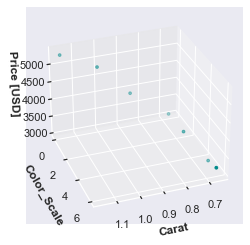

In [51]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter('carat', 'color_scale', 'price', s=30, data=color_avg, marker='.', color='darkcyan')
ax.set_xlabel('Carat',fontweight='bold')
ax.set_ylabel('Color_Scale', fontweight='bold')
ax.set_zlabel('Price [USD]',fontweight='bold')
ax.view_init(30, 70)
plt.show()

# Multiple Subplot

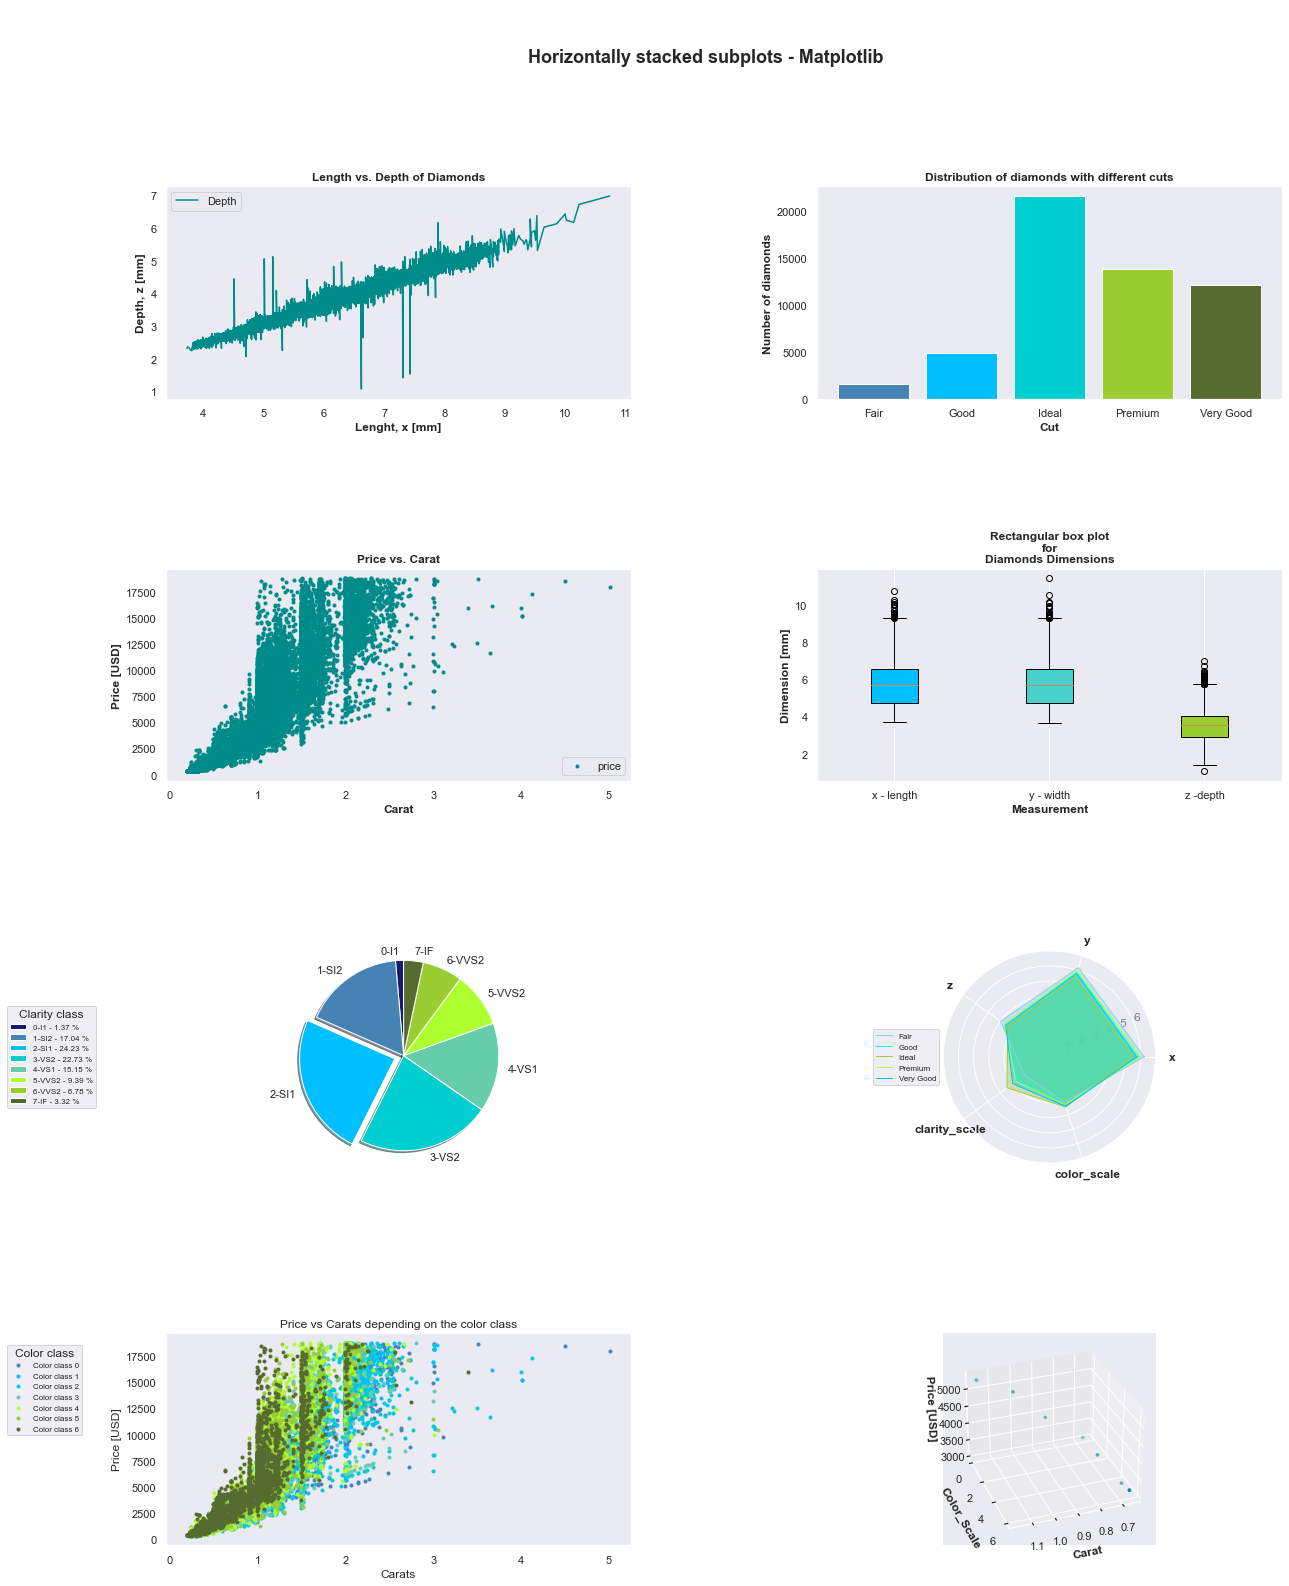

In [49]:
fig = plt.figure(figsize=(20, 25))
fig.subplots_adjust(hspace=0.8, wspace=0.4)
fig.suptitle('\n\nHorizontally stacked subplots - Matplotlib', fontsize=18, fontweight='bold')
ax_linear = fig.add_subplot(4, 2, 1)
ax_bar = fig.add_subplot(4, 2, 2)
ax_scatter = fig.add_subplot(4, 2, 3)
ax_boxplot = fig.add_subplot(4, 2, 4)
ax_piechart = fig.add_subplot(4, 2, 5)
ax_radar = fig.add_subplot(4, 2, 6, polar=True)

# ax_radar = fig.add_subplot(4, 2, 6)
ax_series = fig.add_subplot(4, 2, 7)
ax_3d = fig.add_subplot(4, 2, 8, projection='3d')

# ax_linear
diamonds.sort_values(by=["x", "z"], inplace=True)
ax_linear.plot("x", "z", data=diamonds, color='darkcyan', label='Depth')
ax_linear.set_title('Length vs. Depth of Diamonds', fontweight='bold')
ax_linear.set_xlabel('Lenght, x [mm]', fontweight='bold')
ax_linear.set_ylabel('Depth, z [mm]', fontweight='bold')
ax_linear.grid()
ax_linear.legend(loc="upper left")

# ax_bar
size_cut = diamonds.groupby(['cut'])['carat'].agg(['count'])
size_cut.reset_index(inplace=True)
colors = ['steelblue', 'deepskyblue', 'darkturquoise', 'yellowgreen', 'darkolivegreen']
ax_bar.bar("cut", "count", data=size_cut, color=colors)
ax_bar.set_title('Distribution of diamonds with different cuts', fontweight='bold')
ax_bar.set_xlabel('Cut', fontweight='bold')
ax_bar.set_ylabel('Number of diamonds', fontweight='bold')
ax_bar.grid()

# ax_scatter
ax_scatter.scatter("carat", "price", data=diamonds, color='darkcyan', label='price', marker='.')
ax_scatter.set_title('Price vs. Carat', fontweight='bold')
ax_scatter.set_xlabel('Carat', fontweight='bold')
ax_scatter.set_ylabel('Price [USD]', fontweight='bold')
ax_scatter.grid()
ax_scatter.legend(loc=4)

# box
data = diamonds[['x', 'y', 'z']]
labels = ['x - length', 'y - width', 'z -depth']
# rectangular box plot
bplot1 = ax_boxplot.boxplot(data, vert=True,  # vertical box alignment
                            patch_artist=True,  # fill with color
                            labels=labels,  # will be used to label x-ticks
                            )
ax_boxplot.set_title('Rectangular box plot\nfor\nDiamonds Dimensions', fontweight='bold')
# fill with colors
colors = ['deepskyblue', 'mediumturquoise', 'yellowgreen']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
# adding horizontal grid lines
ax_boxplot.set_ylabel('Dimension [mm]', fontweight='bold')
ax_boxplot.set_xlabel('Measurement', fontweight='bold')
ax_boxplot.grid(axis='y')

# pie
size_clarity = diamonds.groupby(['clarity_scale'])['carat'].agg(['count'])
size_clarity.reset_index(inplace=True)
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['0-I1', '1-SI2', '2-SI1', '3-VS2', '4-VS1', '5-VVS2', '6-VVS2', '7-IF']
sizes = size_clarity['count']
explode = (0, 0, 0.1, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
colors = ['midnightblue', 'steelblue', 'deepskyblue', 'darkturquoise', 'mediumaquamarine', 'greenyellow', 'yellowgreen', 'darkolivegreen']
labels2 = ['{0} - {1:1.2f} %'.format(i, j) for i, j in zip(labels, 100*sizes/sizes.sum())]
ax_piechart.pie(sizes, explode=explode, labels=labels, colors=colors, shadow=True, startangle=90)
ax_piechart.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax_piechart.legend(labels2, loc='center left', title='Clarity class', bbox_to_anchor=(-0.35, .5), fontsize=8)

# Radar
categories = list(cut_avg)[1:]
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]
ax_radar.set_xticks(angles[:-1], categories, fontweight='bold', size=12)
ax_radar.set_yticks(np.arange(1, 7), [1, 2, 3, 4, 5, 6], color='grey', size=12)
ax_radar.set_ylim(0, 7)
# ax_radar.rlabel_position(30)
# part 1
val_c1 = cut_avg.loc[0].drop('cut').values.flatten().tolist()
val_c1 += val_c1[:1]
ax_radar.plot(angles, val_c1, linewidth=1, color='skyblue', linestyle='solid', label='Fair')
ax_radar.fill(angles, val_c1, 'skyblue', alpha=0.4)
# part 2
val_c2 = cut_avg.loc[1].drop('cut').values.flatten().tolist()
val_c2 += val_c2[:1]
ax_radar.plot(angles, val_c2, linewidth=1, color='cyan', linestyle='solid', label='Good')
ax_radar.fill(angles, val_c2, 'cyan', alpha=0.4)
# part 3
val_c3 = cut_avg.loc[2].drop('cut').values.flatten().tolist()
val_c3 += val_c3[:1]
ax_radar.plot(angles, val_c3, linewidth=1, color='yellowgreen', linestyle='solid', label='Ideal')
ax_radar.fill(angles, val_c3, 'yellowgreen', alpha=0.4)
# part 4
val_c4 = cut_avg.loc[3].drop('cut').values.flatten().tolist()
val_c4 += val_c4[:1]
ax_radar.plot(angles, val_c4, linewidth=1, color='greenyellow', linestyle='solid', label='Premium')
ax_radar.fill(angles, val_c4, 'greenyellow', alpha=0.4)
# part 5
val_c5 = cut_avg.loc[4].drop('cut').values.flatten().tolist()
val_c5 += val_c5[:1]
ax_radar.plot(angles, val_c5, linewidth=1, color='deepskyblue', linestyle='solid', label='Very Good')
ax_radar.fill(angles, val_c5, 'deepskyblue', alpha=0.4)
# ax_radar.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
ax_radar.legend(loc='center left', bbox_to_anchor=(-0.35, .5), fontsize=8)

# ax_series
diamonds.sort_values(by=["carat", "price"], inplace=True)
colors = ['steelblue', 'deepskyblue', 'darkturquoise', 'mediumaquamarine', 'greenyellow', 'yellowgreen', 'darkolivegreen']
for num in range(7):
    class_color = diamonds[(diamonds['color_scale'] == num)]
    ax_series.scatter("carat", "price", color=colors[num], label=f'Color class {num}', marker='.', data=class_color)
ax_series.set_xlabel('Carats')
ax_series.set_ylabel('Price [USD]')
ax_series.set_title("Price vs Carats depending on the color class")
ax_series.legend(loc='lower left', title='Color class', bbox_to_anchor=(-0.35, .5), fontsize=8)
ax_series.grid()

# ax_3d
ax_3d.scatter('carat', 'color_scale', 'price', s=30, data=color_avg, marker='.', color='darkcyan')
ax_3d.set_xlabel('Carat',fontweight='bold')
ax_3d.set_ylabel('Color_Scale', fontweight='bold')
ax_3d.set_zlabel('Price [USD]',fontweight='bold')
ax_3d.view_init(30, 70)
plt.show()


# Seaborn

## 1.Line plot

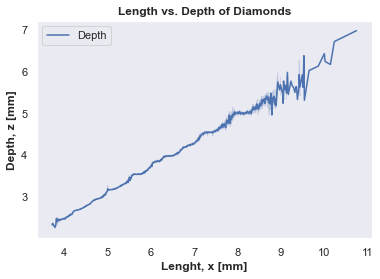

In [19]:

diamonds.sort_values(by=["x", "z"], inplace=True)
sns.set_theme(style="darkgrid")
sns.lineplot(x="x", y="z",data=diamonds, label='Depth')

plt.title('Length vs. Depth of Diamonds', fontweight='bold')
plt.xlabel('Lenght, x [mm]', fontweight='bold')
plt.ylabel('Depth, z [mm]', fontweight='bold')
plt.grid()
plt.legend()
plt.show()


## 2.Bar 

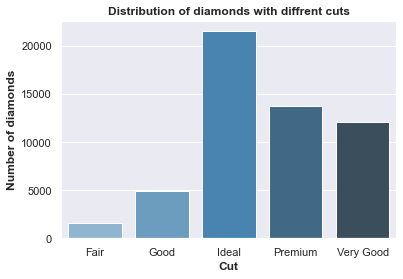

In [20]:
ax = sns.barplot(x="cut", y="count", data=size_cut, palette="Blues_d")
plt.title('Distribution of diamonds with diffrent cuts', fontweight='bold')
plt.xlabel('Cut', fontweight='bold')
plt.ylabel('Number of diamonds', fontweight='bold')
plt.show()

## 3.Scatter

C:\Users\radek\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


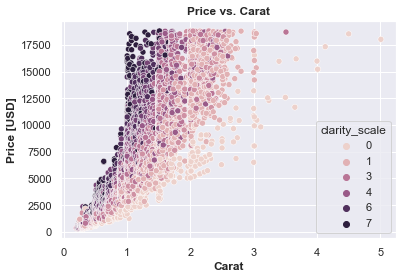

In [21]:
sns.set_theme(style="darkgrid")
sns.scatterplot("carat","price", data=diamonds, hue='clarity_scale')
plt.title('Price vs. Carat', fontweight='bold')
plt.xlabel('Carat', fontweight='bold')
plt.ylabel('Price [USD]', fontweight='bold')
plt.show()


## 4.Boxplot

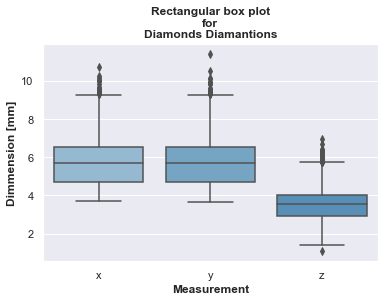

In [22]:
sns.set_theme(style="darkgrid")
data=diamonds[['x','y','z']]
sns.set_palette("Blues_d")
box_sns=sns.boxplot( data=data)
plt.title('Rectangular box plot\nfor\nDiamonds Diamantions', fontweight='bold')

plt.ylabel('Dimmension [mm]', fontweight='bold')
plt.xlabel('Measurement', fontweight='bold')
plt.show()

## 5.Pie chart 

Since Seaborn has no type of pie chart. I will use bar plot again 

In [23]:
size_clarity = diamonds.groupby(['clarity_scale'])['carat'].agg(['count'])
size_clarity.reset_index(inplace=True)
size_clarity['Percentage'] = ((size_clarity['count']/size_clarity['count'].sum())*100).round(2)
size_clarity

,clarity_scale,count,Percentage
0,0,741,1.37
1,1,9189,17.04
2,2,13065,24.23
3,3,12256,22.73
4,4,8170,15.15
5,5,5066,9.39
6,6,3654,6.78
7,7,1790,3.32


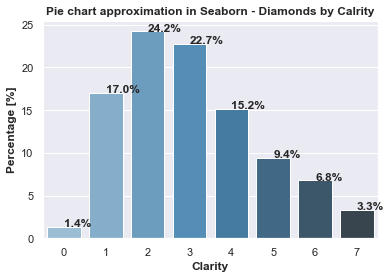

In [24]:
sns.set_style("darkgrid")
bar_sns,ax = plt.subplots()
ax = sns.barplot(x='clarity_scale', y='Percentage', data=size_clarity, palette='Blues_d')
ax.set_title("Pie chart approximation in Seaborn - Diamonds by Calrity",fontweight='bold')
ax.set_xlabel ("Clarity",fontweight='bold')
ax.set_ylabel ("Percentage [%]",fontweight='bold')

# calculate the percentages and annotate the sns barplot
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),"%.1f%%"% rect.get_height(), weight='bold' )
    # ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),"%.1f%%"% rect.get_height(), weight='bold' )

## 6.Radar graph 

Since there is no radar graph in Seaborn I will use a graph that is in this libary I choose jointplot and violinplot

Text(336.9714285714286, 0.5, 'Carat')

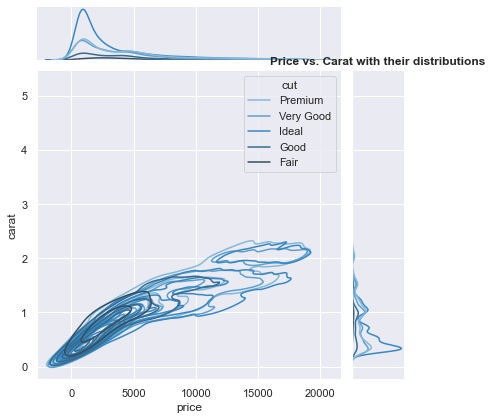

In [25]:
sns.set_theme(style="darkgrid")
# Show the joint distribution using kernel density estimation
ax = sns.jointplot(
    data=diamonds,
    x="price", y="carat", hue="cut",
    kind="kde",
    palette='Blues_d'
)
plt.title("Price vs. Carat with their distributions",fontweight='bold')
plt.xlabel("Price [USD]",fontweight='bold')
plt.ylabel("Carat",fontweight='bold')

Text(0, 0.5, 'Variables')

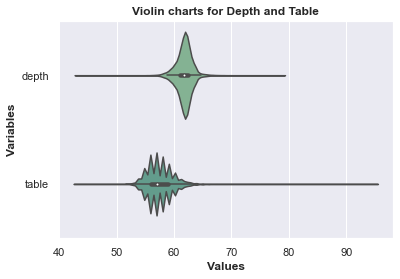

In [26]:
sns.set_theme(style="darkgrid")
sns.set_palette("crest")
sns.violinplot(data=diamonds[[ 'depth', 'table']], orient="h")
plt.title("Violin charts for Depth and Table",fontweight='bold')
plt.xlabel("Values",fontweight='bold')
plt.ylabel("Variables",fontweight='bold')

## 7.Multiple Series

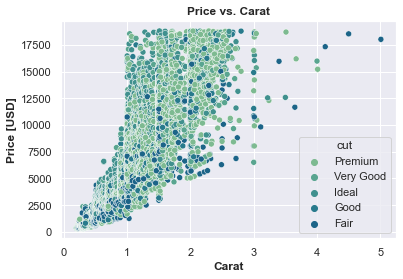

In [39]:
sns.set_theme(style="darkgrid")
sns.set_palette("crest")
# Plot the responses for different events and regions
sns.scatterplot(x="carat", y="price", hue="cut", data=diamonds)
plt.title('Price vs. Carat', fontweight='bold')
plt.xlabel('Carat', fontweight='bold')
plt.ylabel('Price [USD]', fontweight='bold')
plt.show()

## 8.3D Graph

Since Seaborn libary doesn't have 3D graphs I prepared a graph which shows distribution of carats for each cut

C:\Users\radek\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\radek\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\radek\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

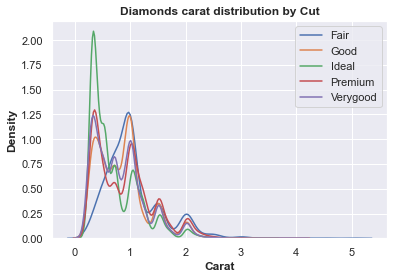

In [58]:
# sns.set_theme(style="darkgrid")
x1 = diamonds.loc[diamonds.cut=='Fair', 'carat']
x2 = diamonds.loc[diamonds.cut=='Good', 'carat']
x3 = diamonds.loc[diamonds.cut=='Ideal', 'carat']
x4 = diamonds.loc[diamonds.cut=='Premium', 'carat']
x5 = diamonds.loc[diamonds.cut=='Very Good', 'carat']

plt.figure()
y=[1,2,3,4,5,6]
sns.set_theme(style="darkgrid")
sns.distplot(x1,1, hist=False, label="Fair")
sns.distplot(x2,2,hist=False, label="Good")
sns.distplot(x3,3,hist=False, label="Ideal")
sns.distplot(x4,4, hist=False, label="Premium")
sns.distplot(x5,5,hist=False, label="Verygood")
plt.legend();


plt.title('Diamonds carat distribution by Cut', fontweight='bold')
plt.xlabel('Carat', fontweight='bold')
plt.ylabel('Density', fontweight='bold')
plt.show()

# Seaborn subplots

C:\Users\radek\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\radek\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\radek\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kerne

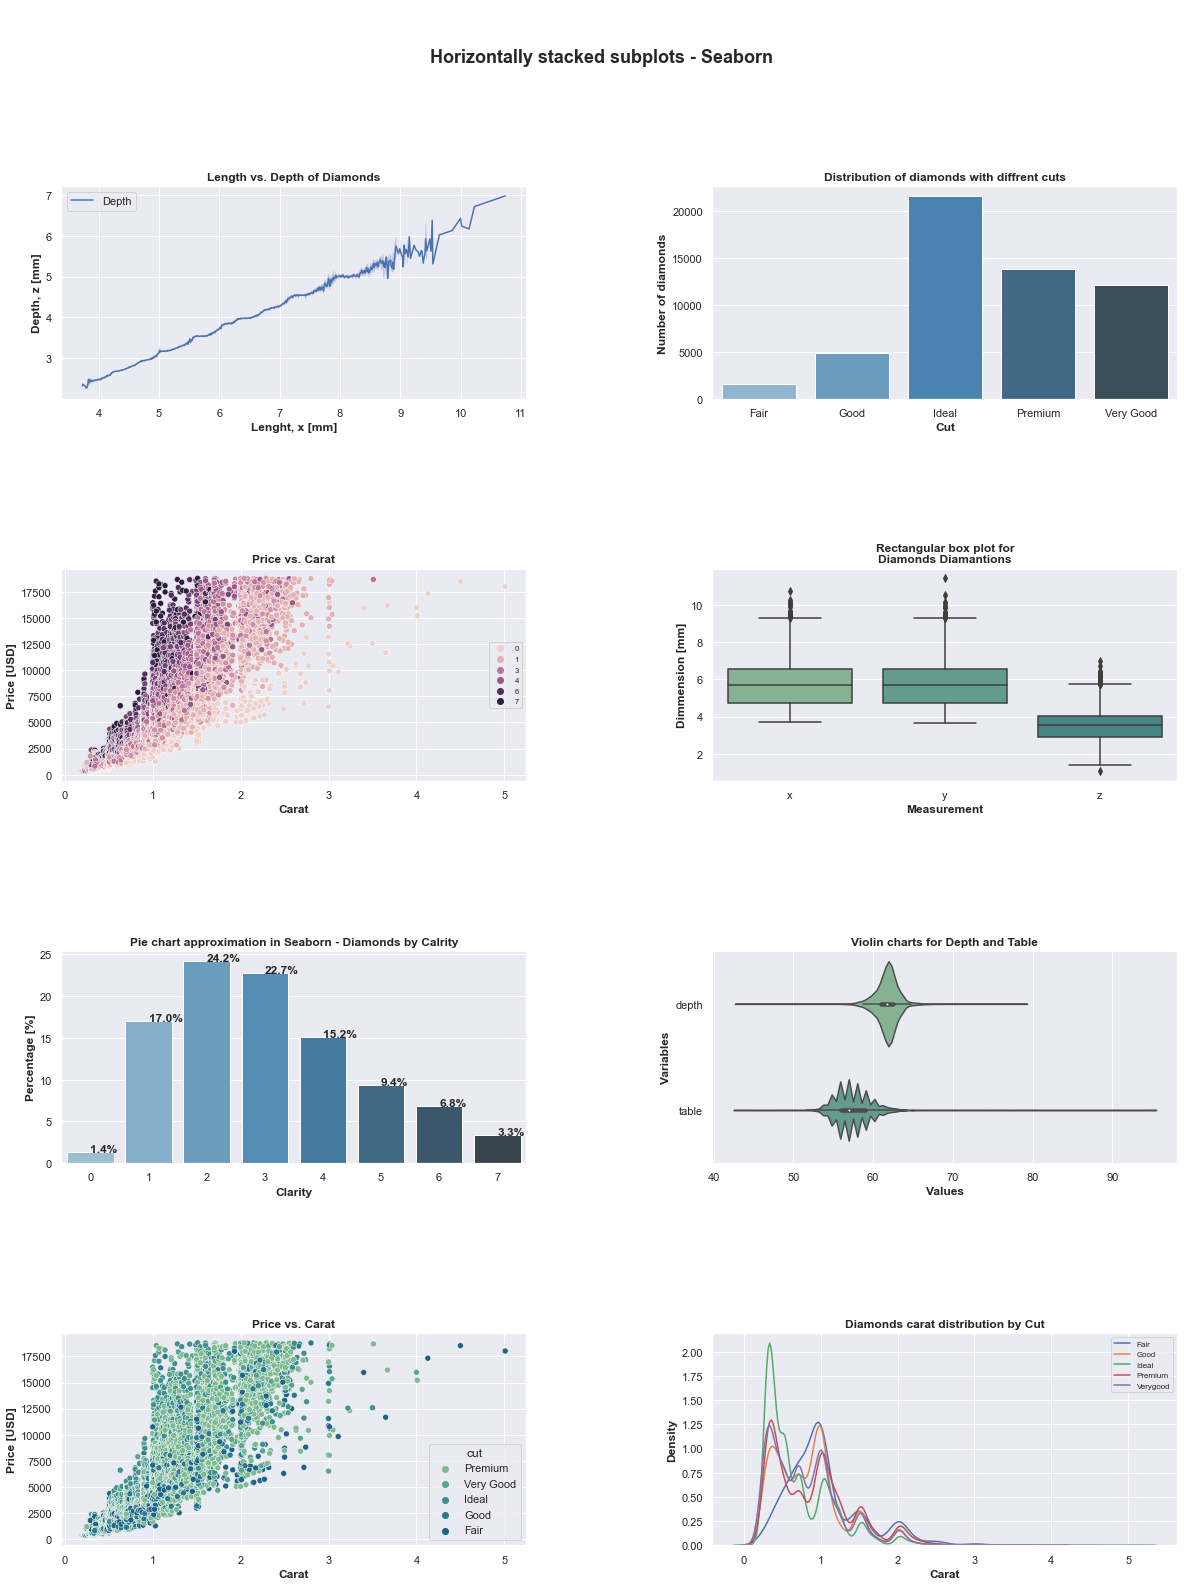

<Figure size 432x288 with 0 Axes>

In [59]:
fig = plt.figure(figsize=(20, 25))
fig.subplots_adjust(hspace=0.8, wspace=0.4)
fig.suptitle('\n\nHorizontally stacked subplots - Seaborn', fontsize=18, fontweight='bold')
ax_linear = fig.add_subplot(4, 2, 1)
ax_bar = fig.add_subplot(4, 2, 2)
ax_scatter = fig.add_subplot(4, 2, 3)
ax_boxplot = fig.add_subplot(4, 2, 4)
ax_piechart = fig.add_subplot(4, 2, 5)
ax_radar = fig.add_subplot(4, 2, 6)
ax_series = fig.add_subplot(4, 2, 7)
ax_3d = fig.add_subplot(4, 2, 8)

#ax_linear
diamonds.sort_values(by=["x", "z"], inplace=True)
sns.set_theme(style="darkgrid")
sns.lineplot(x="x", y="z",data=diamonds, label='Depth', ax=ax_linear)

ax_linear.set_title('Length vs. Depth of Diamonds', fontweight='bold')
ax_linear.set_xlabel('Lenght, x [mm]', fontweight='bold')
ax_linear.set_ylabel('Depth, z [mm]', fontweight='bold')

# ax_bar
sns.barplot(x="cut", y="count", data=size_cut, palette="Blues_d", ax=ax_bar)
ax_bar.set_title('Distribution of diamonds with diffrent cuts', fontweight='bold')
ax_bar.set_xlabel('Cut', fontweight='bold')
ax_bar.set_ylabel('Number of diamonds', fontweight='bold')


#ax_scatter
sns.set_theme(style="darkgrid")
sns.scatterplot("carat","price", data=diamonds, hue='clarity_scale',ax=ax_scatter)
ax_scatter.set_title('Price vs. Carat', fontweight='bold')
ax_scatter.set_xlabel('Carat', fontweight='bold')
ax_scatter.set_ylabel('Price [USD]', fontweight='bold')
ax_scatter.legend(loc='center right', fontsize=8)


#ax_boxplot
sns.set_theme(style="darkgrid")
data=diamonds[['x','y','z']]
sns.set_palette("crest")
box_sns=sns.boxplot( data=data, ax=ax_boxplot)
ax_boxplot.set_title('Rectangular box plot for\nDiamonds Diamantions', fontweight='bold')

ax_boxplot.set_ylabel('Dimmension [mm]', fontweight='bold')
ax_boxplot.set_xlabel('Measurement', fontweight='bold')


#ax_piechart
size_clarity = diamonds.groupby(['clarity_scale'])['carat'].agg(['count'])
size_clarity.reset_index(inplace=True)
size_clarity['Percentage'] = ((size_clarity['count']/size_clarity['count'].sum())*100).round(2)
sns.set_style("darkgrid")
sns.set_palette("crest")
sns.barplot(x='clarity_scale', y='Percentage', data=size_clarity, ax=ax_piechart, palette='Blues_d')
ax_piechart.set_title("Pie chart approximation in Seaborn - Diamonds by Calrity",fontweight='bold')
ax_piechart.set_xlabel ("Clarity",fontweight='bold')
ax_piechart.set_ylabel ("Percentage [%]",fontweight='bold')

# calculate the percentages and annotate the sns barplot
for rect in ax_piechart.patches:
    ax_piechart.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),"%.1f%%"% rect.get_height(), weight='bold' )

#ax_radar
sns.set_theme(style="darkgrid")
sns.set_palette("crest")
sns.violinplot(data=diamonds[[ 'depth', 'table']], orient="h", ax=ax_radar)
ax_radar.set_title("Violin charts for Depth and Table",fontweight='bold')
ax_radar.set_xlabel("Values",fontweight='bold')
ax_radar.set_ylabel("Variables",fontweight='bold')

#ax_series
sns.set_theme(style="darkgrid")
sns.set_palette("crest")
# Plot the responses for different events and regions
sns.scatterplot(x="carat", y="price", hue="cut", data=diamonds, ax=ax_series)
ax_series.set_title('Price vs. Carat', fontweight='bold')
ax_series.set_xlabel('Carat', fontweight='bold')
ax_series.set_ylabel('Price [USD]', fontweight='bold')
ax_scatter.legend(loc='center right', fontsize=8)


#ax_3d
# sns.set_theme(style="darkgrid")
x1 = diamonds.loc[diamonds.cut=='Fair', 'carat']
x2 = diamonds.loc[diamonds.cut=='Good', 'carat']
x3 = diamonds.loc[diamonds.cut=='Ideal', 'carat']
x4 = diamonds.loc[diamonds.cut=='Premium', 'carat']
x5 = diamonds.loc[diamonds.cut=='Very Good', 'carat']

plt.figure()
sns.set_theme(style="darkgrid")
sns.distplot(x1, hist=False, label="Fair", ax=ax_3d)
sns.distplot(x2,hist=False, label="Good", ax=ax_3d)
sns.distplot(x3,hist=False, label="Ideal", ax=ax_3d)
sns.distplot(x4, hist=False, label="Premium", ax=ax_3d)
sns.distplot(x5,hist=False, label="Verygood", ax=ax_3d)
ax_3d.set_title('Diamonds carat distribution by Cut', fontweight='bold')
ax_3d.set_xlabel('Carat', fontweight='bold')
ax_3d.set_ylabel('Density', fontweight='bold')
ax_3d.legend(fontsize=8)
